<a href="https://colab.research.google.com/github/ixomaxip/nasoc/blob/master/src/LaBSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from google.colab import files
uploaded = files.upload()

!rm -rf /root/.ssh
!mkdir /root/.ssh
# !tar -xvzf ssh.tar.gz -C /root/.ssh && rm -rf ssh.tar.gz && chmod 700 /root/.ssh
!tar -xvzf ssh.tar.gz -C /root/.ssh && rm -rf ssh.tar.gz
!ssh-keyscan -t rsa github.com >> /root/.ssh/known_hosts

!git config --global user.email 'ixomaxip@gmail.com'
!git config --global user.user 'ixomaxip'
!ssh -T git@github.com

!git clone git@github.com:ixomaxip/nasoc.git

Saving ssh.tar.gz to ssh.tar.gz
./id_rsa
./id_rsa.pub
# github.com:22 SSH-2.0-babeld-968490c5
Hi ixomaxip! You've successfully authenticated, but GitHub does not provide shell access.
Cloning into 'nasoc'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 53 (delta 17), reused 13 (delta 0), pack-reused 0
Receiving objects: 100% (53/53), 392.29 KiB | 2.06 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [48]:
import os
import pandas as pd

In [49]:
os.getcwd()

'/content'

In [82]:
FULL_PATH = '/content/nasoc/data/en_Hasoc2021_train.csv'
TRAIN_PATH = '/content/nasoc/data/train.csv'
TEST_PATH = '/content/nasoc/data/validate.csv'

full_df = pd.read_csv(FULL_PATH)
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

print(f'''shapes:
  full: {full_df.shape}
  train: {train_df.shape}
  test: {test_df.shape}
''')
print(f'''classes:
  task_1: {full_df.task_1.unique()}
  task_2: {full_df.task_2.unique()}
''')
train_df.columns

shapes:
  full: (3843, 5)
  train: (3074, 7)
  test: (769, 7)

classes:
  task_1: ['HOF' 'NOT']
  task_2: ['PRFN' 'OFFN' 'NONE' 'HATE']



Index(['Unnamed: 0', '_id', 'text', 'task_1', 'task_2', 'inputs',
       'task_2_cat'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7effda46f2d0>,
      dtype=object)

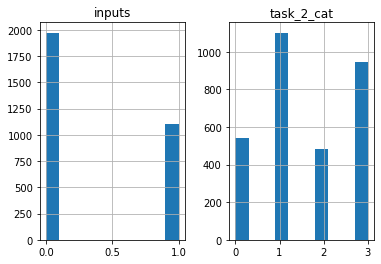

In [79]:
train_df.hist()

In [105]:
def prepare_df(path, task):
  df = pd.read_csv(path)
  df.rename(columns={f'task_{task}': 'y'}, inplace=True)
  df = df[['text', 'y']]
  return df

# Task 1

In [110]:
train_t1 = prepare_df(TRAIN_PATH, task=1)
test_t1 = prepare_df(TEST_PATH, task=1)
test_t1.y.unique()

array(['HOF', 'NOT'], dtype=object)

,text,y
0,4lakh cases in a day ðŸ˜” @PMOIndia @drharshva...,HOF
1,@SiennaSummerEIC @Chantel_Etoile You do unders...,HOF
2,$66000 is such a weird fine for trying to get ...,HOF
3,@MickeyBlowtorch I've been frustrated by this ...,HOF
4,just want the swagger of that one asshole drum...,HOF
...,...,...
764,@TimesNow Again this government has made a foo...,HOF
765,im online for some naughty fun - sexy slut #wh...,HOF
766,Narcissists piss me the fuck off!!,HOF
767,Imagine if cri cri wasn’t around. You would’ve...,HOF


# Task 2

In [112]:
train_t1 = prepare_df(TRAIN_PATH, task=2)
test_t1 = prepare_df(TEST_PATH, task=2)
test_t1.y.unique()

array(['OFFN', 'PRFN', 'HATE', 'NONE'], dtype=object)